In [38]:
from eppy import modeleditor
from eppy.modeleditor import IDF
from matplotlib import pyplot as plt
import os
import pandas as pd
plt.rcParams['figure.figsize'] = [15, 10]

In [50]:
iddfile='/usr/local/EnergyPlus-9-0-1/Energy+.idd'
fname = '/home/ict4bd/test.idf'
weather='ITA_Torino-Caselle.160590_IGDG.epw'

In [51]:
IDF.setiddname(iddfile)
idf = IDF(fname,weather)

In [52]:
idf.printidf()


Version,
    9.0;                      !- Version Identifier

SimulationControl,
    Yes,                      !- Do Zone Sizing Calculation
    Yes,                      !- Do System Sizing Calculation
    No,                       !- Do Plant Sizing Calculation
    No,                       !- Run Simulation for Sizing Periods
    Yes;                      !- Run Simulation for Weather File Run Periods

Building,
    Building,                 !- Name
    0,                        !- North Axis
    Suburbs,                  !- Terrain
    0.04,                     !- Loads Convergence Tolerance Value
    0.4,                      !- Temperature Convergence Tolerance Value
    FullExterior,             !- Solar Distribution
    25,                       !- Maximum Number of Warmup Days
    6;                        !- Minimum Number of Warmup Days

ShadowCalculation,
    AverageOverDaysInFrequency,    !- Calculation Method
    20,                       !- Calculation Frequency
    150

In [53]:
for key in idf.idfobjects.keys():
    print (key)

VERSION
SIMULATIONCONTROL
BUILDING
SHADOWCALCULATION
SURFACECONVECTIONALGORITHM:INSIDE
SURFACECONVECTIONALGORITHM:OUTSIDE
HEATBALANCEALGORITHM
HEATBALANCESETTINGS:CONDUCTIONFINITEDIFFERENCE
ZONEAIRHEATBALANCEALGORITHM
ZONEAIRCONTAMINANTBALANCE
ZONEAIRMASSFLOWCONSERVATION
ZONECAPACITANCEMULTIPLIER:RESEARCHSPECIAL
TIMESTEP
CONVERGENCELIMITS
HVACSYSTEMROOTFINDINGALGORITHM
COMPLIANCE:BUILDING
SITE:LOCATION
SITE:VARIABLELOCATION
SIZINGPERIOD:DESIGNDAY
SIZINGPERIOD:WEATHERFILEDAYS
SIZINGPERIOD:WEATHERFILECONDITIONTYPE
RUNPERIOD
RUNPERIODCONTROL:SPECIALDAYS
RUNPERIODCONTROL:DAYLIGHTSAVINGTIME
WEATHERPROPERTY:SKYTEMPERATURE
SITE:WEATHERSTATION
SITE:HEIGHTVARIATION
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE
SITE:GROUNDTEMPERATURE:FCFACTORMETHOD
SITE:GROUNDTEMPERATURE:SHALLOW
SITE:GROUNDTEMPERATURE:DEEP
SITE:GROUNDTEMPERATURE:UNDISTURBED:FINITEDIFFERENCE
SITE:GROUNDTEMPERATURE:UNDISTURBED:KUSUDAACHENBACH
SITE:GROUNDTEMPERATURE:UNDISTURBED:XING
SITE:GROUNDDOMAIN:SLAB
SITE:GROUNDDOMAIN:BASEMENT
SITE:G

Select all the MATERIAL objects

In [54]:
materials = idf.idfobjects["MATERIAL"]
print (materials)

[
Material,
    Urea Formaldehyde Foam_00171,    !- Name
    Rough,                    !- Roughness
    0.0171,                   !- Thickness
    0.04,                     !- Conductivity
    10,                       !- Density
    1400,                     !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.6,                      !- Solar Absorptance
    0.6;                      !- Visible Absorptance
, 
Material,
    Cast Concrete_01,         !- Name
    Rough,                    !- Roughness
    0.1,                      !- Thickness
    1.13,                     !- Conductivity
    2000,                     !- Density
    1000,                     !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.6,                      !- Solar Absorptance
    0.6;                      !- Visible Absorptance
, 
Material,
    Floor/Roof Screed_007,    !- Name
    Rough,                    !- Roughness
    0.07,                     !- Thickness
 

In [55]:
cons = idf.idfobjects["CONSTRUCTION"]
print (cons)

[
Construction,
    LinearBridgingConstruction,    !- Name
    LinearBridgingLayer;      !- Outside Layer
, 
Construction,
    IRTSurface,               !- Name
    IRTMaterial;              !- Outside Layer
, 
Construction,
    Project ground floor,     !- Name
    Urea Formaldehyde Foam_00171,    !- Outside Layer
    Cast Concrete_01,         !- Layer 2
    Floor/Roof Screed_007,    !- Layer 3
    Timber Flooring_003;      !- Layer 4
, 
Construction,
    Project ground floor_Rev,    !- Name
    Timber Flooring_003,      !- Outside Layer
    Floor/Roof Screed_007,    !- Layer 2
    Cast Concrete_01,         !- Layer 3
    Urea Formaldehyde Foam_00171;    !- Layer 4
, 
Construction,
    Project flat roof,        !- Name
    Asphalt 1_001,            !- Outside Layer
    MW Glass Wool (rolls)_00245,    !- Layer 2
    3_RVAL_3,                 !- Layer 3
    Plasterboard_0013;        !- Layer 4
, 
Construction,
    Project flat roof_Rev,    !- Name
    Plasterboard_0013,        !- Outsid

Select all the surfaces

In [56]:
surfaces = idf.idfobjects['BUILDINGSURFACE:DETAILED']
print (surfaces)

[
BuildingSurface:Detailed,
    Block1:ZoneWest_GroundFloor_0_0_0,    !- Name
    Floor,                    !- Surface Type
    Project ground floor,     !- Construction Name
    Block1:ZoneWest,          !- Zone Name
    Ground,                   !- Outside Boundary Condition
    ,                         !- Outside Boundary Condition Object
    NoSun,                    !- Sun Exposure
    NoWind,                   !- Wind Exposure
    AutoCalculate,            !- View Factor to Ground
    3,                        !- Number of Vertices
    -8.9122703919,            !- Vertex 1 Xcoordinate
    7.6645538881,             !- Vertex 1 Ycoordinate
    0,                        !- Vertex 1 Zcoordinate
    -8.9122703919,            !- Vertex 2 Xcoordinate
    22.6645538881,            !- Vertex 2 Ycoordinate
    0,                        !- Vertex 2 Zcoordinate
    -1.4122703919,            !- Vertex 3 Xcoordinate
    15.1645538881,            !- Vertex 3 Ycoordinate
    0;                 

Surface objects provides parameters such as:

In [57]:
asurface = surfaces[0]
print ("surface azimuth =",  asurface.azimuth, "degrees")
print ("surface tilt =", asurface.tilt, "degrees")
print ("surface area =", asurface.area, "m2")

surface azimuth = 0.0 degrees
surface tilt = 180.0 degrees
surface area = 56.249999999999986 m2


Get the names of the surfaces

In [12]:
s_names = [surface.Name for surface in surfaces]
print (s_names) # print five of them

['Block1:ZoneWest_GroundFloor_0_0_0', 'Block1:ZoneWest_Roof_1_0_0', 'Block1:ZoneWest_Partition_2_0_0', 'Block1:ZoneSouth_Partition_3_0_10000', 'Block1:ZoneWest_Partition_3_0_0', 'Block1:ZoneNorth_Partition_4_0_10001', 'Block1:ZoneWest_Wall_4_0_0', 'Block1:ZoneSouth_GroundFloor_0_0_0', 'Block1:ZoneSouth_Roof_1_0_0', 'Block1:ZoneSouth_Partition_2_0_0', 'Block1:ZoneEast_Partition_4_0_10002', 'Block1:ZoneSouth_Wall_4_0_0', 'Block1:ZoneEast_GroundFloor_0_0_0', 'Block1:ZoneEast_Roof_1_0_0', 'Block1:ZoneEast_Wall_2_0_0', 'Block1:ZoneEast_Partition_3_0_0', 'Block1:ZoneNorth_Partition_2_0_10003', 'Block1:ZoneNorth_GroundFloor_0_0_0', 'Block1:ZoneNorth_Roof_1_0_0', 'Block1:ZoneNorth_Wall_3_0_0']


Let us try to isolate the vertical out-door walls



In [13]:
vertical_walls = [sf for sf in surfaces if (sf.tilt == 90.0 and sf.Outside_Boundary_Condition=='Outdoors')]
print ([sf.Name for sf in vertical_walls])
print ([sf.Construction_Name for sf in vertical_walls])

['Block1:ZoneWest_Wall_4_0_0', 'Block1:ZoneSouth_Wall_4_0_0', 'Block1:ZoneEast_Wall_2_0_0', 'Block1:ZoneNorth_Wall_3_0_0']
['Project wall', 'Project wall', 'Project wall', 'Project wall']


In [14]:
con_change=[con for con in cons if con.Name in [sf.Construction_Name for sf in vertical_walls]]
print (con_change)


[
Construction,
    Project wall,             !- Name
    Brickwork Outer_01,       !- Outside Layer
    XPS Extruded Polystyrene  - CO2 Blowing_0041,    !- Layer 2
    Concrete Block (Medium)_01,    !- Layer 3
    Gypsum Plastering_0013;    !- Layer 4
]


In [20]:
mat_select=[mat.fieldvalues[1:] for mat in con_change]
print(mat_select)
mat_change=[mat.Name for mat in materials if mat.Name in (mat_select[0])]
mat_change

[['Project wall', 'Brickwork Outer_01', 'XPS Extruded Polystyrene  - CO2 Blowing_0041', 'Concrete Block (Medium)_01', 'Gypsum Plastering_0013']]


['Brickwork Outer_01',
 'XPS Extruded Polystyrene  - CO2 Blowing_0041',
 'Concrete Block (Medium)_01',
 'Gypsum Plastering_0013']

In [21]:
idf.run(readvars=True)


/usr/local/EnergyPlus-9-0-1/energyplus --weather /home/ict4bd/ipythonEC/eppy/ITA_Torino-Caselle.160590_IGDG.epw --output-directory /home/ict4bd/ipythonEC/eppy --idd /usr/local/EnergyPlus-9-0-1/Energy+.idd --readvars /home/ict4bd/ipythonEC/eppy/in.idf



In [22]:
df1=pd.read_csv('eplusout.csv')

In [29]:
for i in df1.columns:
    if 'Temperature' in i and 'Zone' in i:
        print(i)

BLOCK1:ZONEWEST:Zone Mean Radiant Temperature [C](Hourly)
BLOCK1:ZONEWEST:Zone Mean Radiant Temperature [C](Daily)
BLOCK1:ZONEWEST:Zone Mean Radiant Temperature [C](Monthly)
BLOCK1:ZONEWEST:Zone Mean Radiant Temperature [C](RunPeriod)
BLOCK1:ZONESOUTH:Zone Mean Radiant Temperature [C](Hourly)
BLOCK1:ZONESOUTH:Zone Mean Radiant Temperature [C](Daily)
BLOCK1:ZONESOUTH:Zone Mean Radiant Temperature [C](Monthly)
BLOCK1:ZONESOUTH:Zone Mean Radiant Temperature [C](RunPeriod)
BLOCK1:ZONEEAST:Zone Mean Radiant Temperature [C](Hourly)
BLOCK1:ZONEEAST:Zone Mean Radiant Temperature [C](Daily)
BLOCK1:ZONEEAST:Zone Mean Radiant Temperature [C](Monthly)
BLOCK1:ZONEEAST:Zone Mean Radiant Temperature [C](RunPeriod)
BLOCK1:ZONENORTH:Zone Mean Radiant Temperature [C](Hourly)
BLOCK1:ZONENORTH:Zone Mean Radiant Temperature [C](Daily)
BLOCK1:ZONENORTH:Zone Mean Radiant Temperature [C](Monthly)
BLOCK1:ZONENORTH:Zone Mean Radiant Temperature [C](RunPeriod)
BLOCK1:ZONEWEST:Zone Mean Air Temperature [C](Hourly

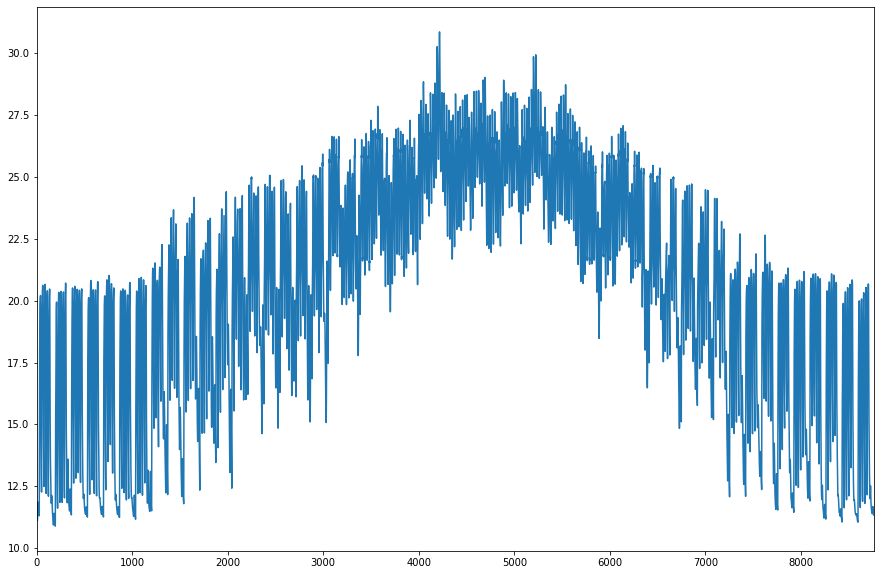

In [39]:
df1['BLOCK1:ZONESOUTH:Zone Operative Temperature [C](Hourly)'].plot()

In [31]:
df1['BLOCK1:ZONESOUTH:Zone Operative Temperature [C](Hourly)'].max()

30.870894117421788

In [32]:
for mat in materials:
    if mat.Name in mat_change:
        mat.Density=1000.0
        mat.Specific_Heat=900.0

In [33]:
idf.run(readvars=True)


/usr/local/EnergyPlus-9-0-1/energyplus --weather /home/ict4bd/ipythonEC/eppy/ITA_Torino-Caselle.160590_IGDG.epw --output-directory /home/ict4bd/ipythonEC/eppy --idd /usr/local/EnergyPlus-9-0-1/Energy+.idd --readvars /home/ict4bd/ipythonEC/eppy/in.idf



In [35]:
df=pd.read_csv('eplusout.csv')

In [1]:
for col in df.columns:
    print (col)

NameError: name 'df' is not defined

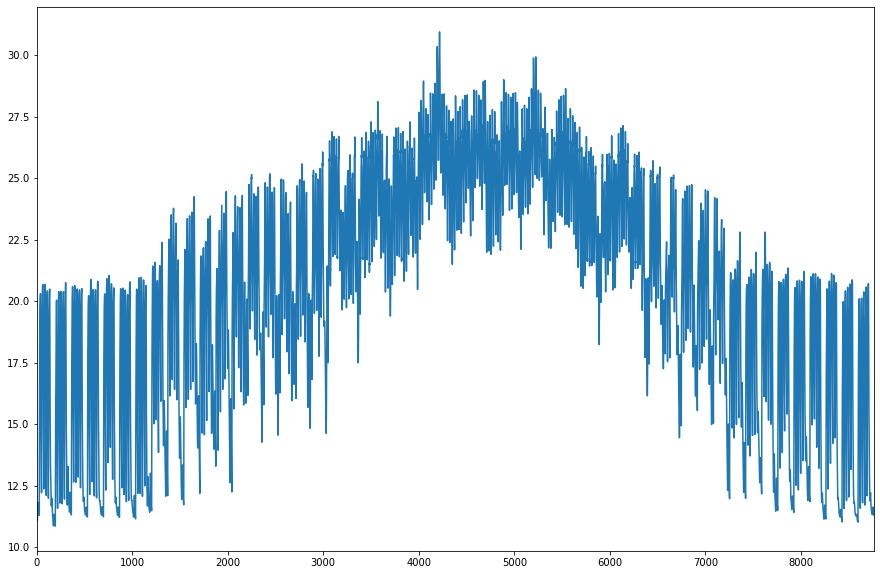

In [40]:
df['BLOCK1:ZONESOUTH:Zone Operative Temperature [C](Hourly)'].plot()

In [37]:
df['BLOCK1:ZONESOUTH:Zone Operative Temperature [C](Hourly)'].max()

30.95128725830071